# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'> **Technocolabs Mini Project: Bigmart Sales Dataset**<h2>
# <h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:coral;border:20px;color:white'>**Author: Sandhya Thappetla** <h2>
    


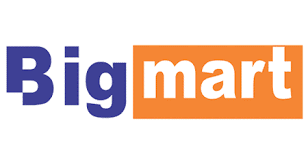

#Table of Contents


#1. Introduction
#3. Libraries
#4. File path
#5. Preprocessing and Data Analysis
#6. Machine learning models
#7. Conclusion

##**Introduction**

### Problem Statement

BigMart, a prominent retail chain, is keen on improving its sales
forecasting capabilities to optimize inventory management and enhance overall operational efficiency. The company has collected comprehensive sales data for the year 2013, encompassing 1559 products distributed across 10 distinct stores in diverse cities.

However, the dataset is not without challenges, as technical glitches have led to missing values in certain records, necessitating careful treatment. The overarching objective of this data science project is to develop a robust predictive model capable of accurately estimating the sales for each product at a specific store.

### Hypothesis Generation

1. **Missing Values and Data Completeness**:  The missing values in the dataset are not random but are associated with certain stores or specific types of products. It is anticipated that the completeness of sales data is influenced by external factors, and understanding these factors will be crucial for effective imputation.

2. **Store Location and Sales Performance:** The geographical location of a store significantly influences its sales performance. Stores in urban centers or areas with higher population density are expected to demonstrate higher sales figures.
3. **Seasonal Sales Patterns:** Certain products may exhibit seasonal variations in sales, influenced by factors such as holidays or specific seasons. Understanding and predicting these seasonal patterns are crucial for accurate sales forecasting.

4. **Store Size and Variety:** The size of a store and the variety of
products offered impact sales. Larger stores with a diverse range of products are likely to attract a broader customer base, resulting in increased sales.

#Data Id 📋

This dataset is named[**BigMart** **Sales**]. The dataset contains a set of **8**,**523** records under **12** attributes:



#Libraries 📕📗📘

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score as CVS

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

#File paths 📂

In [ ]:
#list all files under the input directory
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#path for the training set
tr_path = "/input/bigmart-sales-data/Train.csv"
#path for the testing set
te_path = "/input/bigmart-sales-data/Test.csv"

In [ ]:
import zipfile
import os

In [ ]:
# Replace 'your_zip_file.zip' with the actual name of your zip file
zip_file_path = '/content/9961_14084_bundle_archive.zip'
extracted_folder = 'extracted_data/'

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

In [ ]:
extracted_files = os.listdir(extracted_folder)
print(extracted_files)

['Train.csv', 'Test.csv']


# Data Strucute and Content

In [ ]:
#Display basic info about the training dataset
print(Train_df.info())
#Size of training dataset
print(f"training set (row, col): {Train_df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
training set (row, col): (8523, 12)


In [ ]:
#Display basic info about the training dataset
print(Test_df.info())
#Size of testing dataset
print(f"testing set (row, col): {Test_df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
testing set (row, col): (5681, 11)


#Preprocessing and Data Analysis 💻

##First look at the data:

###Training set :

In [ ]:
# Load the training dataset
Train_df = pd.read_csv(os.path.join(extracted_folder, 'Train.csv'))
## explore the first 5 rows
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Preprocessing of the Training Dataset

In [ ]:
#column information
Train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#summary statistics test
Train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###Preprocessing of the Testing Dataset

###Testing Set :

In [ ]:
# Load the testing dataset
Test_df = pd.read_csv(os.path.join(extracted_folder, 'Test.csv'))
## explore the first 5 rows
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#column information
Test_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
#summary statistics test
Test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


###Handling Duplicate Values ❌





In [ ]:
# Handling duplicate values

# Display unique values in 'Item_Fat_Content' before handling duplicates in training data
print("Unique values in 'Item_Fat_Content' in training data before handling duplicates:", Train_df['Item_Fat_Content'].unique())

# Mapping dictionary for handling duplicates
fat_content_mapping = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}

# Replace values using the mapping dictionary in training data
Train_df['Item_Fat_Content'] = Train_df['Item_Fat_Content'].replace(fat_content_mapping)

# Display unique values in 'Item_Fat_Content' after handling duplicates in training data
print("Unique values in 'Item_Fat_Content' in training data after handling duplicates:", Train_df['Item_Fat_Content'].unique())

# Display unique values in 'Item_Fat_Content' before handling duplicates in testing data
print("Unique values in 'Item_Fat_Content' in testing data before handling duplicates:", Test_df['Item_Fat_Content'].unique())

# Replace values using the mapping dictionary in testing data
Test_df['Item_Fat_Content'] = Test_df['Item_Fat_Content'].replace(fat_content_mapping)

# Display unique values in 'Item_Fat_Content' after handling duplicates in testing data
print("Unique values in 'Item_Fat_Content' in testing data after handling duplicates:", Test_df['Item_Fat_Content'].unique())


Unique values in 'Item_Fat_Content' in training data before handling duplicates: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in 'Item_Fat_Content' in training data after handling duplicates: ['Low Fat' 'Regular']
Unique values in 'Item_Fat_Content' in testing data before handling duplicates: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Unique values in 'Item_Fat_Content' in testing data after handling duplicates: ['Low Fat' 'Regular']


##Missing Values 🚫
There are many ways data can end up with missing values. For example:


1.   The product wasn't weighed.
2.   The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

*   by numbers
*   by 1%

This analysis will also compare to the test and train datasets for evaluation.





In [ ]:
#missing values in decsending order
print("Train:\n")
print(Train_df.isnull().sum().sort_values(ascending=False),"\n\n",Train_df.isnull().sum()/Train_df.shape[0] *100,"\n\n")
print("Test:\n")
print(Test_df.isnull().sum().sort_values(ascending=False),"\n\n",Test_df.isnull().sum()/Test_df.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

We can see the % of each missing Values per columns is almost identical!

| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

###Let's check the value counts for Outlet_Size and Item_Weight:

In [ ]:
print("Outlet_Size:\n", Train_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", Train_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [ ]:
print("test mode, train mode\n",[Train_df['Outlet_Size'].mode().values[0], Test_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [ ]:
#train
Train_df['Outlet_Size'] = Train_df['Outlet_Size'].fillna(
Train_df['Outlet_Size'].dropna().mode().values[0])

#test
Test_df['Outlet_Size'] = Test_df['Outlet_Size'].fillna(
Test_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
Train_df['Outlet_Size'].isnull().sum(),Test_df['Outlet_Size'].isnull().sum()

(0, 0)

`item_weight`  is a numerical column therefore we need to visualize it's distribution for a clearer display
i will use the boxplot in seaborn:

  <tr><td>
    <img src="https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png"
         width="400" height="300">
      <tr><td align="LEFT">

Text(0.5, 1.0, 'Item_Weight Boxplot')

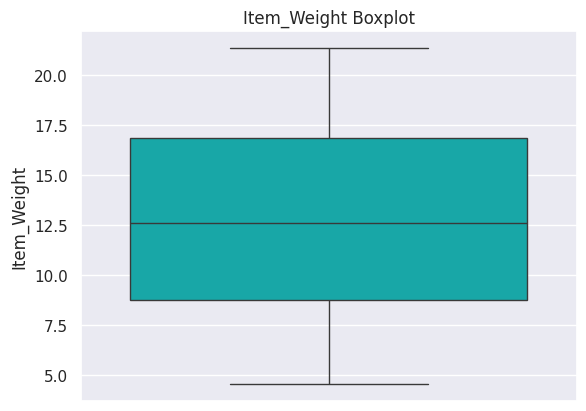

In [ ]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=Train_df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

In [ ]:
#train
Train_df['Item_Weight'] = Train_df['Item_Weight'].fillna(
Train_df['Item_Weight'].dropna().mean())

#test
Test_df['Item_Weight'] = Test_df['Item_Weight'].fillna(
Test_df['Item_Weight'].dropna().mean())

#checking if we filled missing values
Train_df['Item_Weight'].isnull().sum(),Test_df['Item_Weight'].isnull().sum()

(0, 0)

### Now we can see using the `.info()` method we can see we have filled succesfully all mising the missing data for both sets:

In [ ]:
print("train:\n")
print(Train_df.info())
print("\n\ntest:\n")
print(Test_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

## Data Exploration

![](https://media4.giphy.com/media/4FQMuOKR6zQRO/giphy.webp?cid=ecf05e47fnhzie81p8aajp6hyz56d8yrtbf2vgbvhuw9xklt&rid=giphy.webp)

Firstly we need to split our data to categorical and numerical data,

using the `.select_dtypes('dtype').columns.to_list()` combination.

In [ ]:
#list of all the numeric columns
num = Train_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = Train_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  Train_df[num]
#categoric df
BM_cat = Train_df[cat]

#print(num)
#print(cat)

[Train_df[category].value_counts() for category in cat[1:]]

[Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    5577
 Grocery 

We can See we have Repeating values with different names in the `Item_Fat_Content` column,
we will correct them using the using the `.replace()` method

In [ ]:
#train
Train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
Train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
Train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Let's take a look again at our data:

In [ ]:
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [ ]:
#creating our new column for both datasets
Train_df['Outlet_Age'], Test_df['Outlet_Age']= Train_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), Test_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

Train_df['Outlet_Age'].head
Test_df['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

## Data Visualization 📊

### Univariate Plots
For starters we will create countplots for the categorical columns:

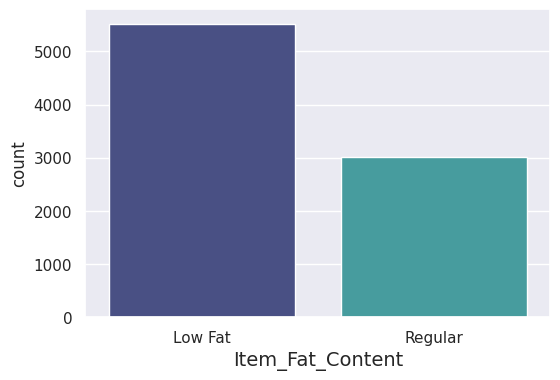

In [ ]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=Train_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

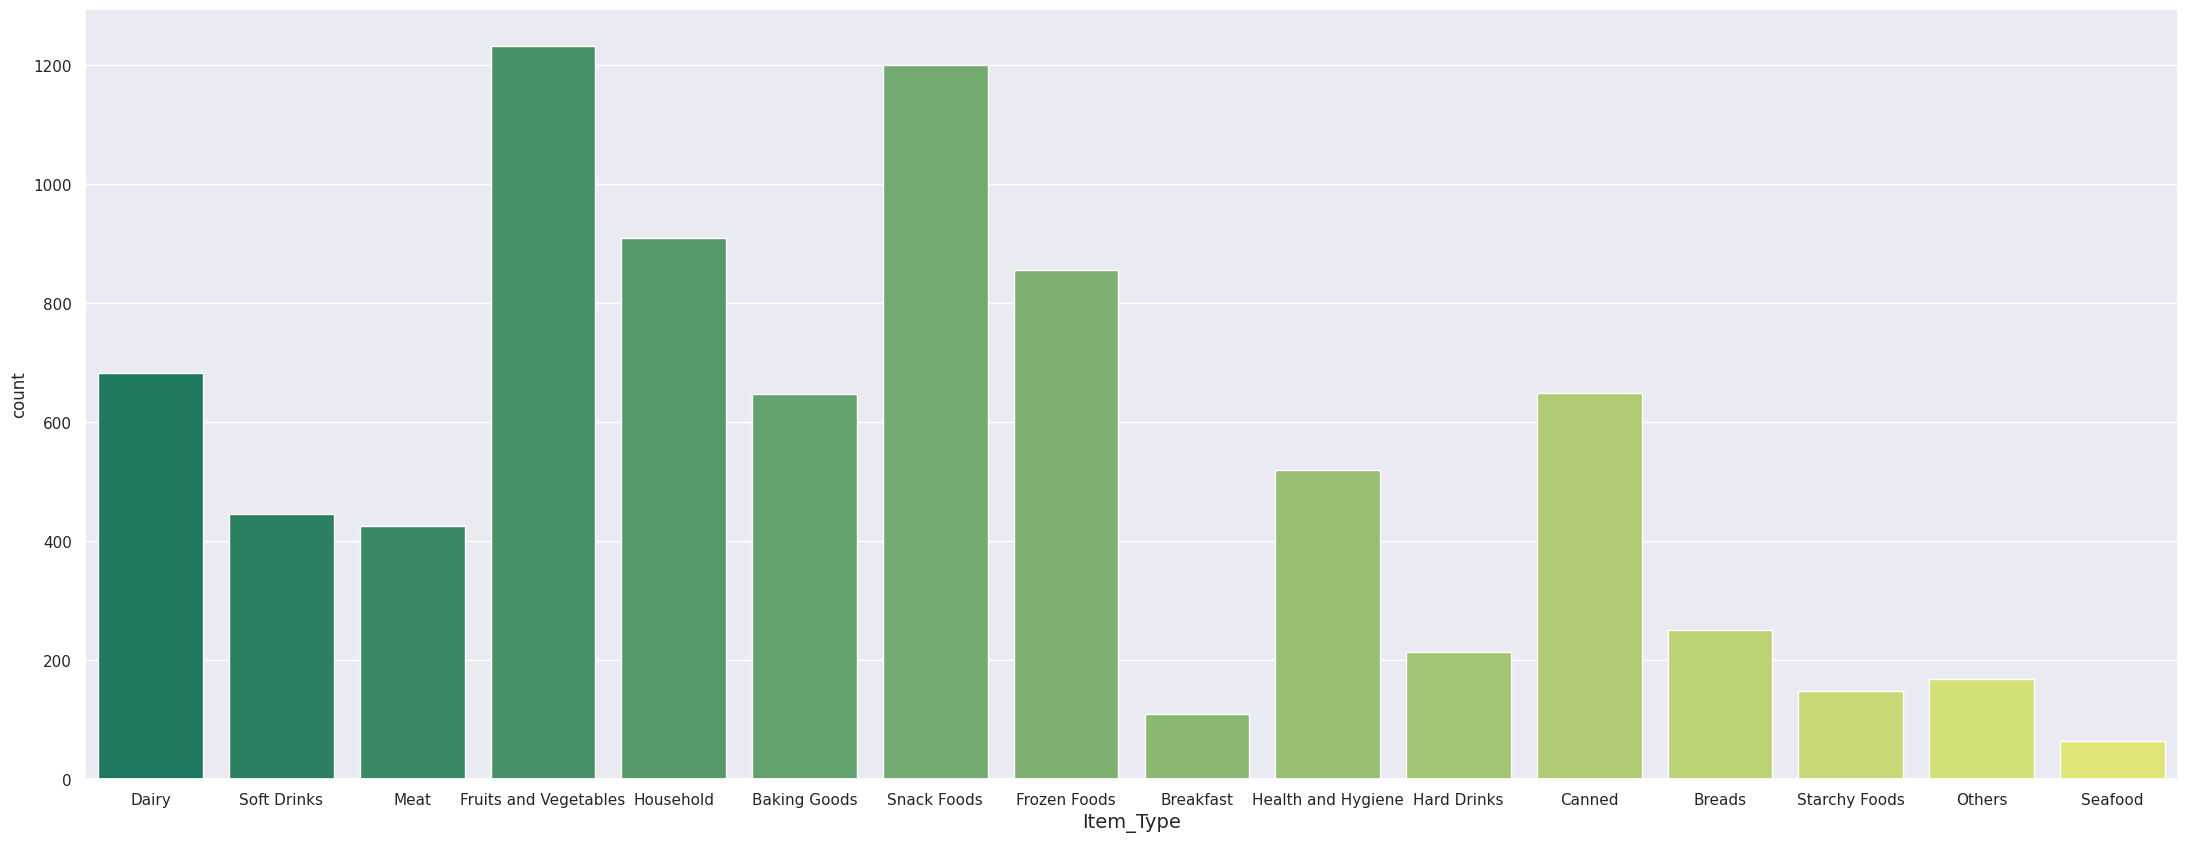

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=Train_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

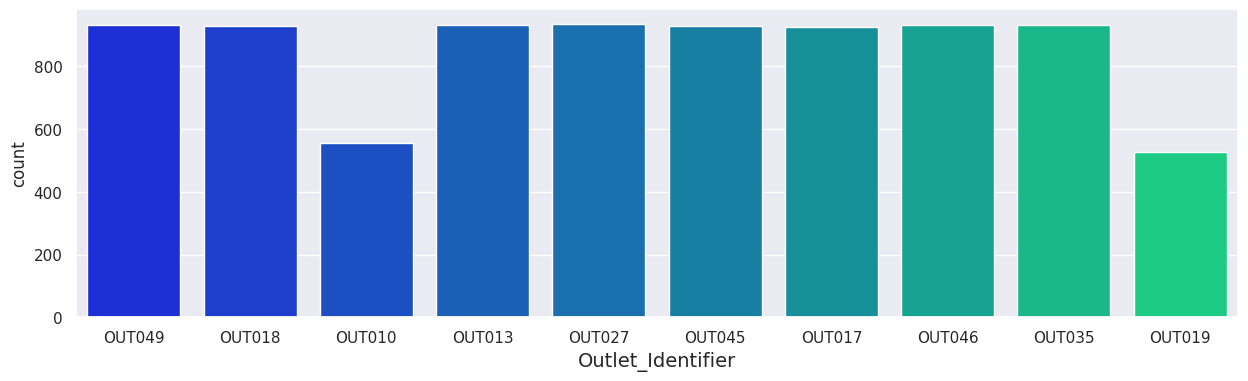

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=Train_df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

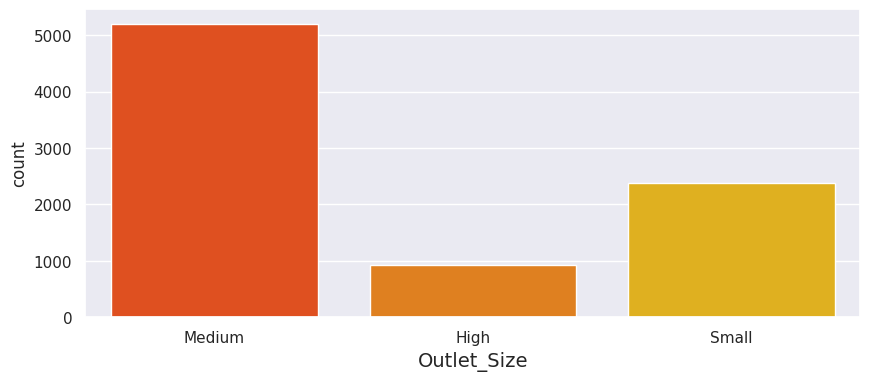

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=Train_df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

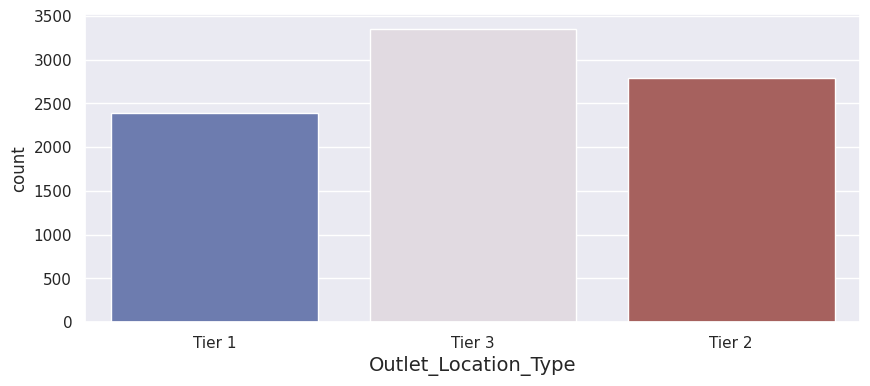

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=Train_df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

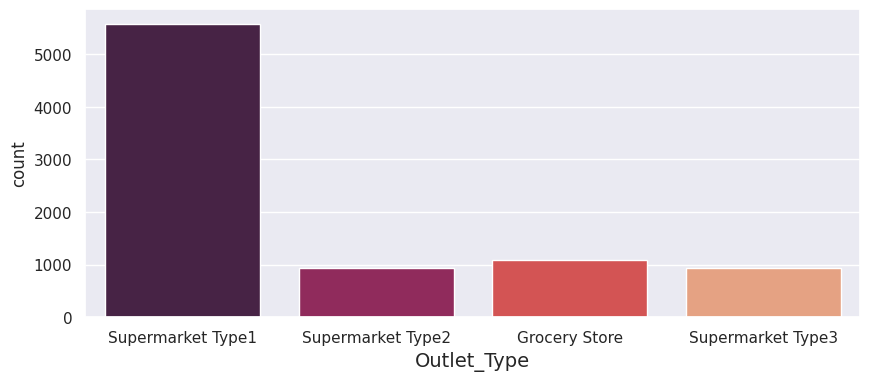

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=Train_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

###Bivariate Analysis

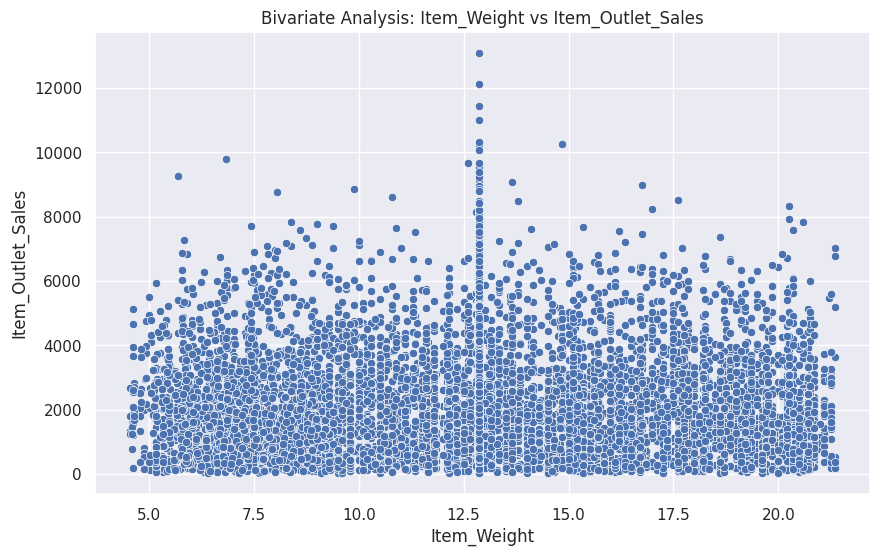

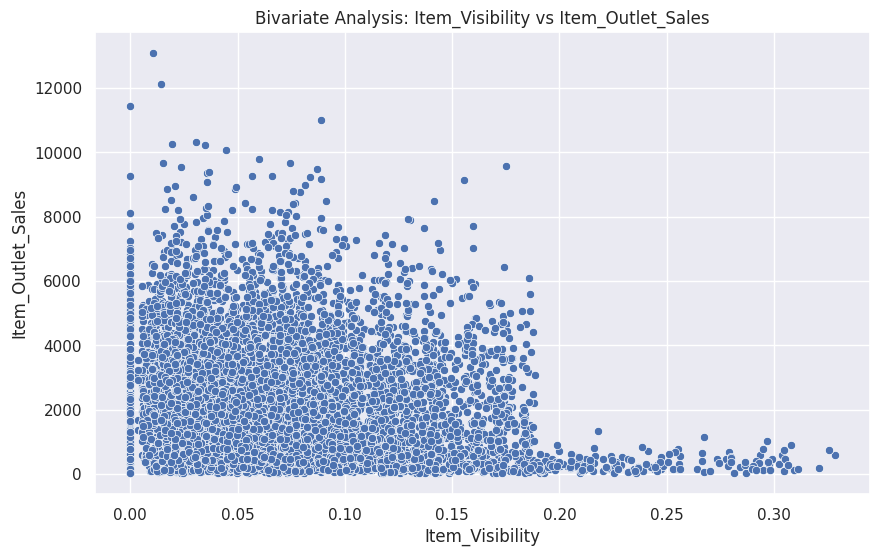

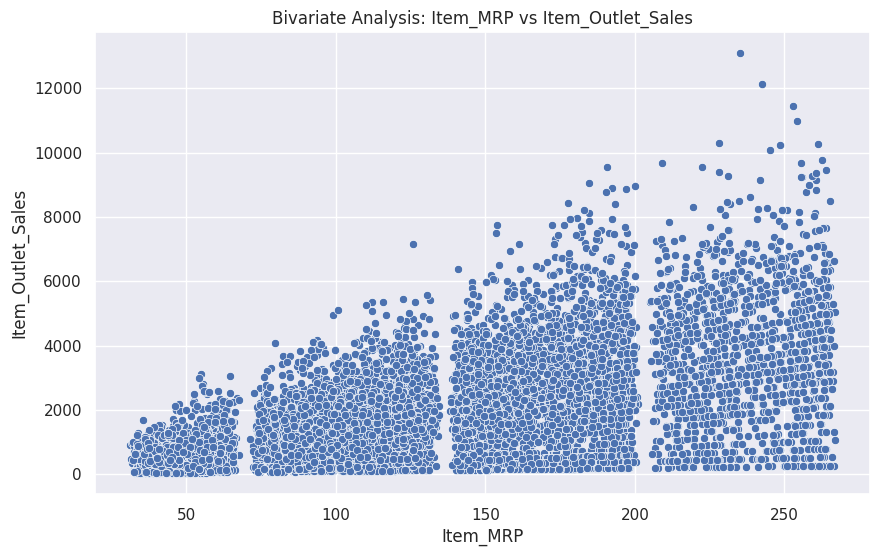

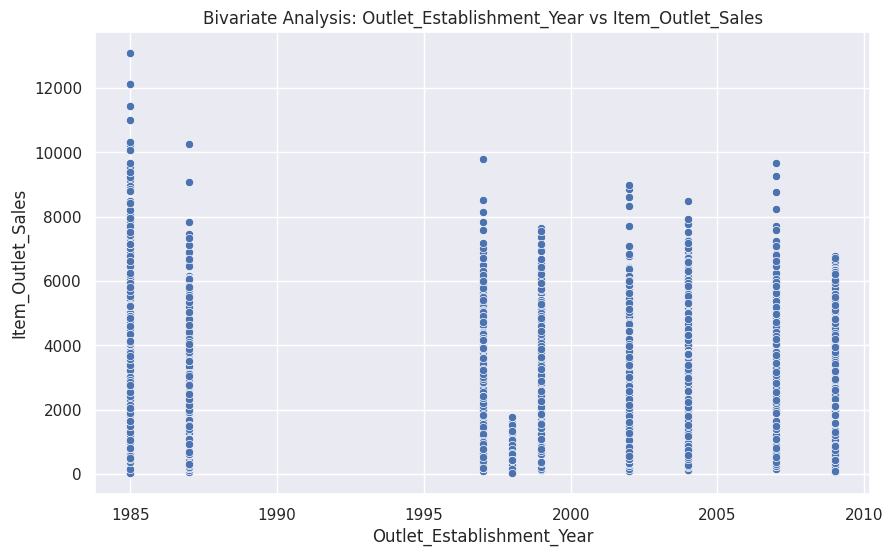

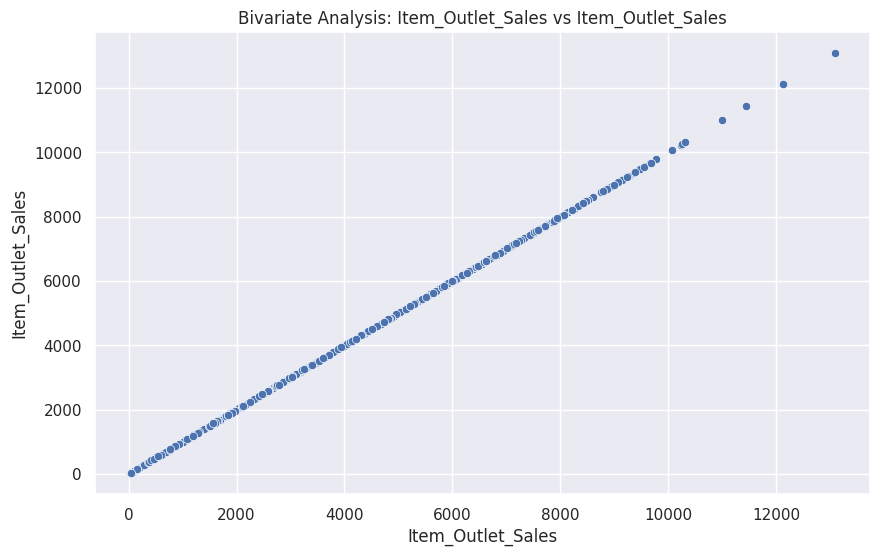

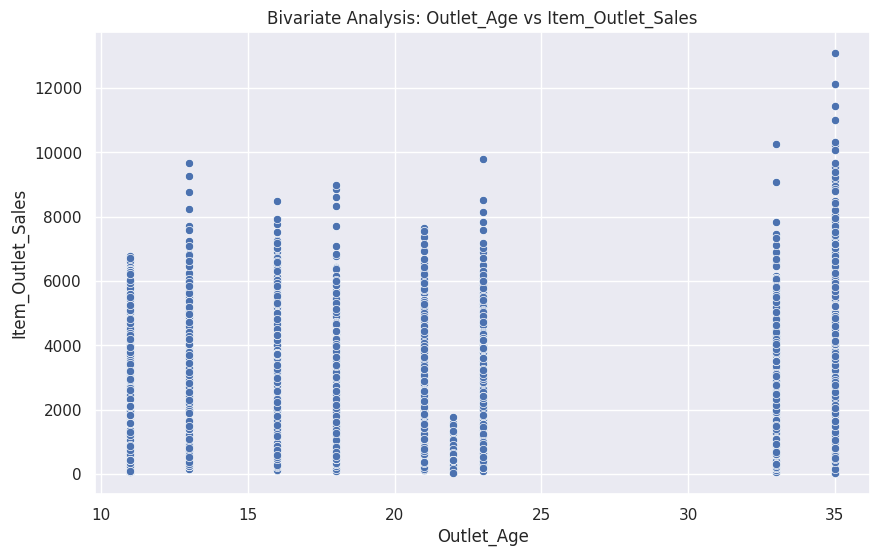

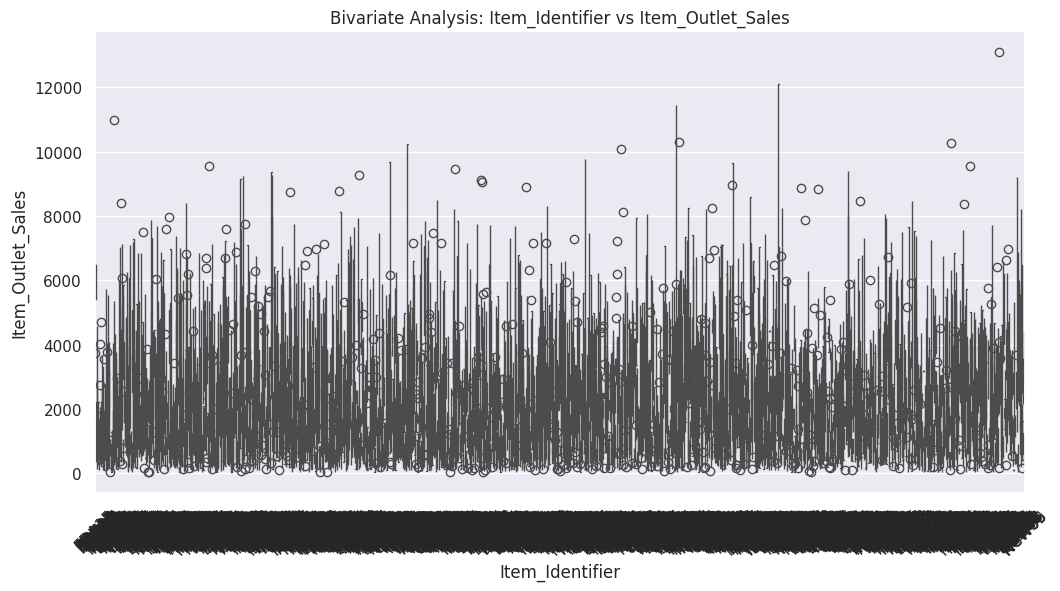

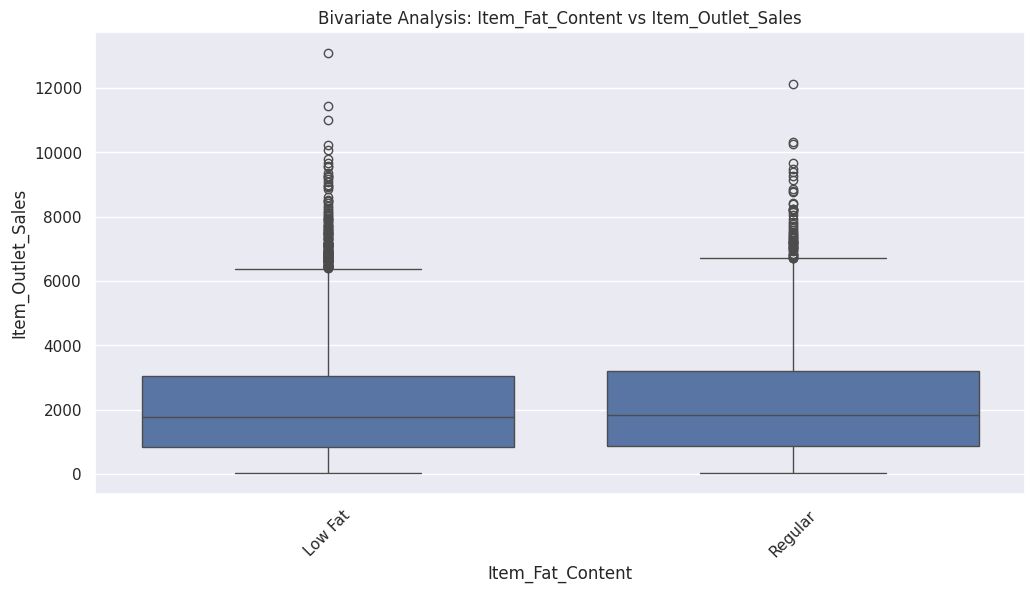

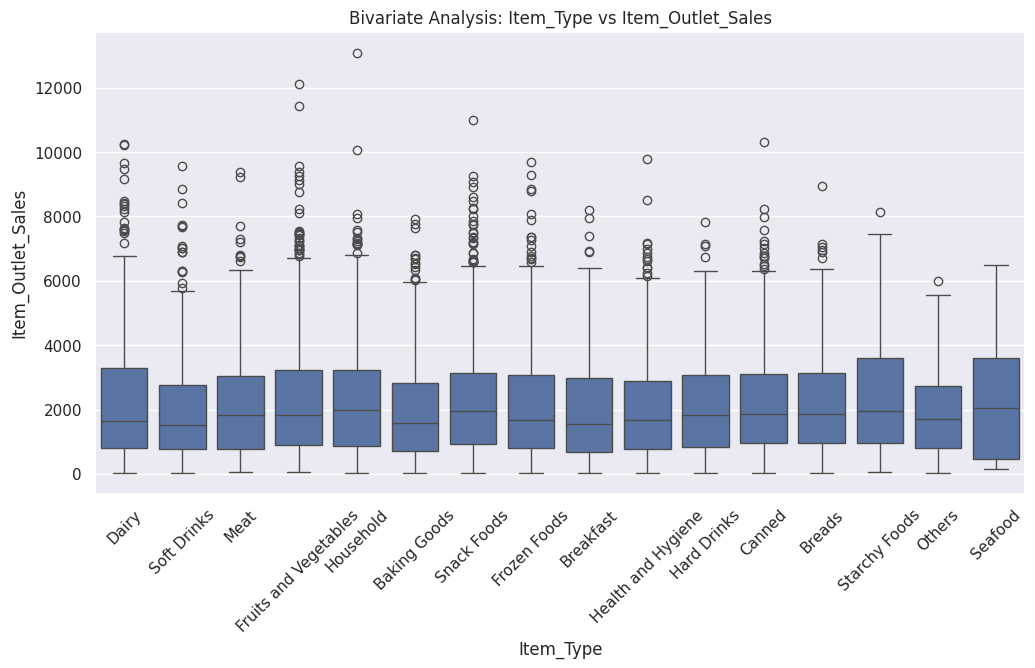

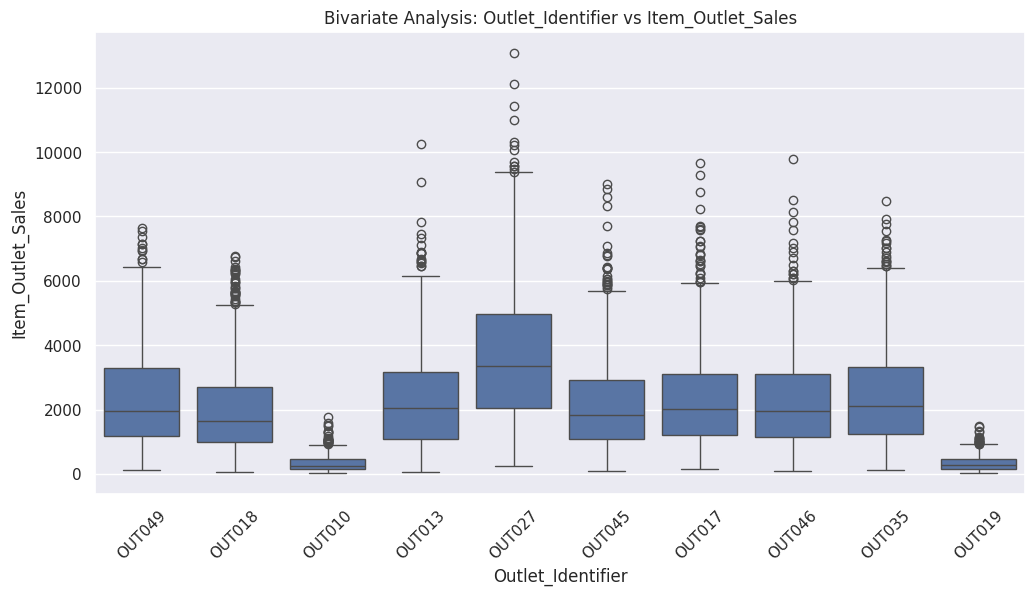

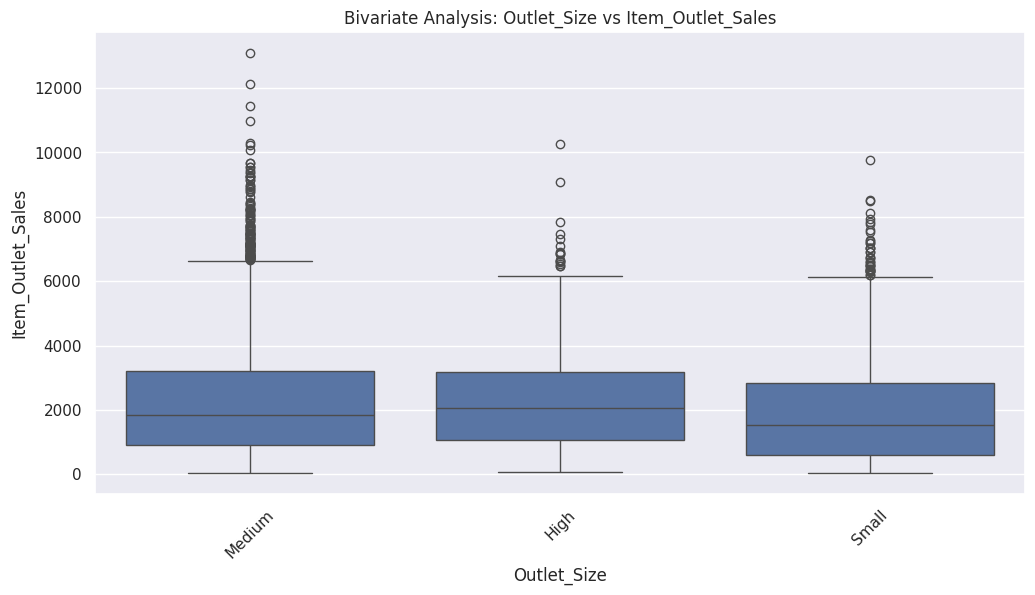

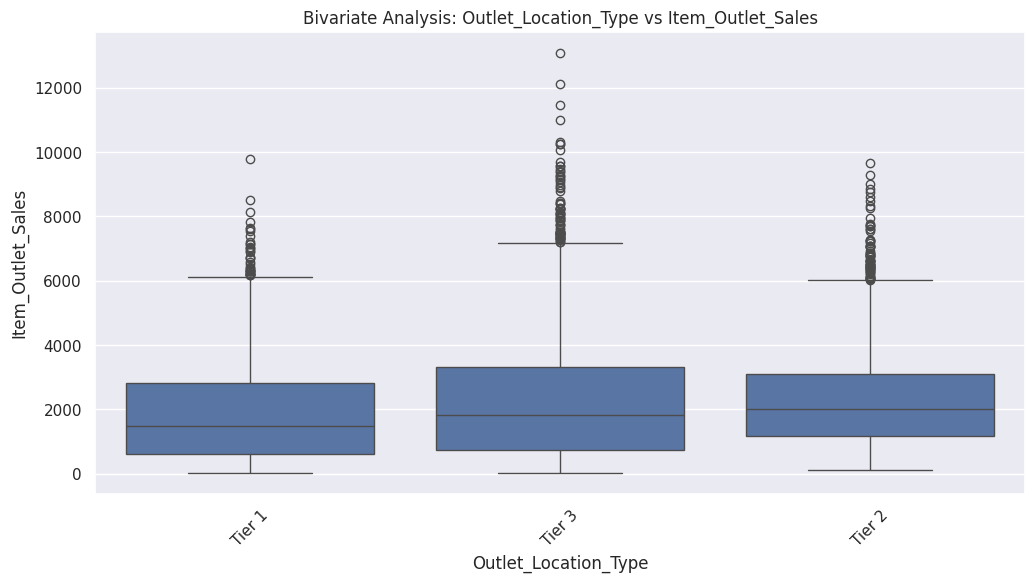

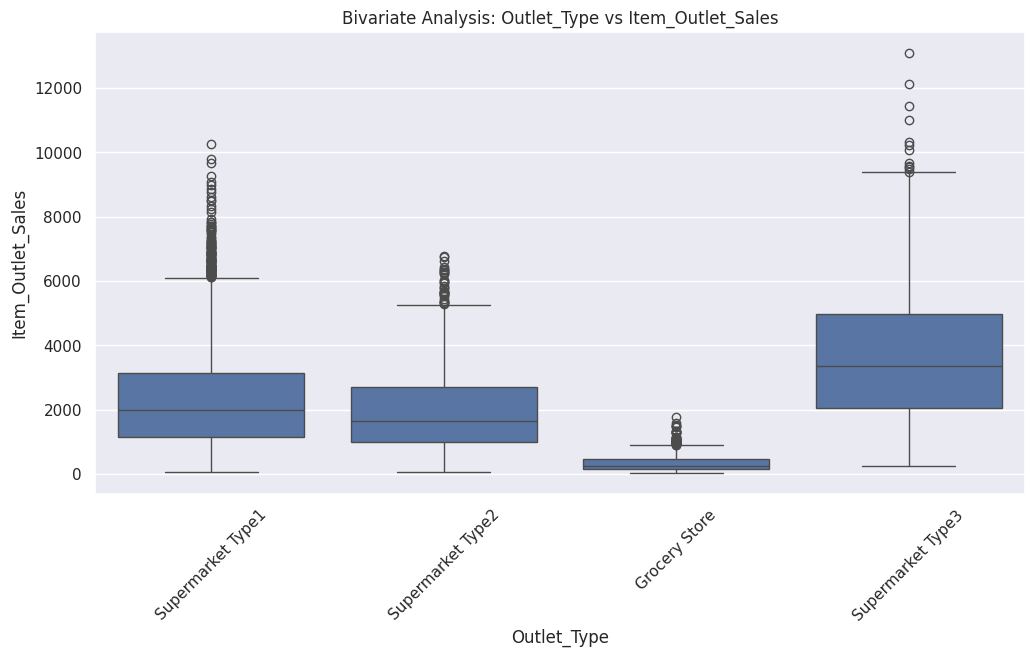

In [ ]:
# bivariate analysis for training data

import matplotlib.pyplot as plt
import seaborn as sns
# Bivariate analysis for numerical features
numerical_features = Train_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
    plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
    plt.show()

# Bivariate analysis for categorical features
categorical_features = Train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
    plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
    plt.xticks(rotation=45)
    plt.show()

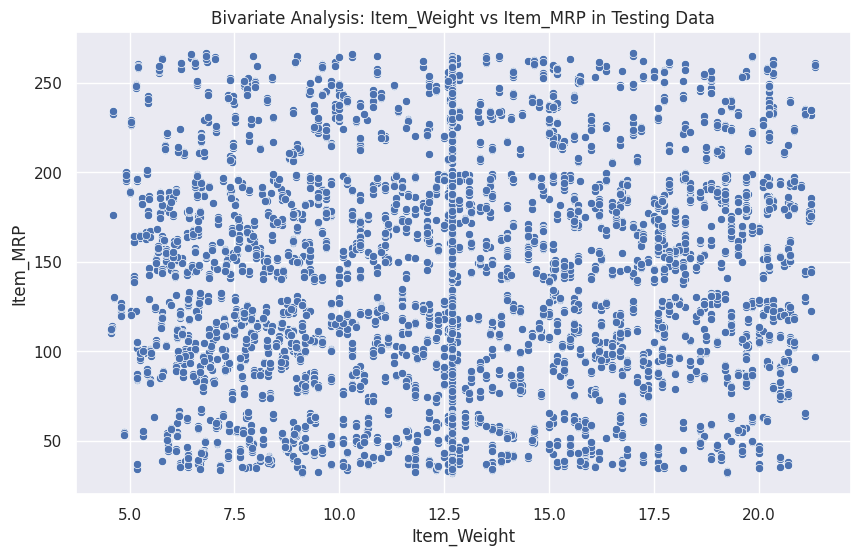

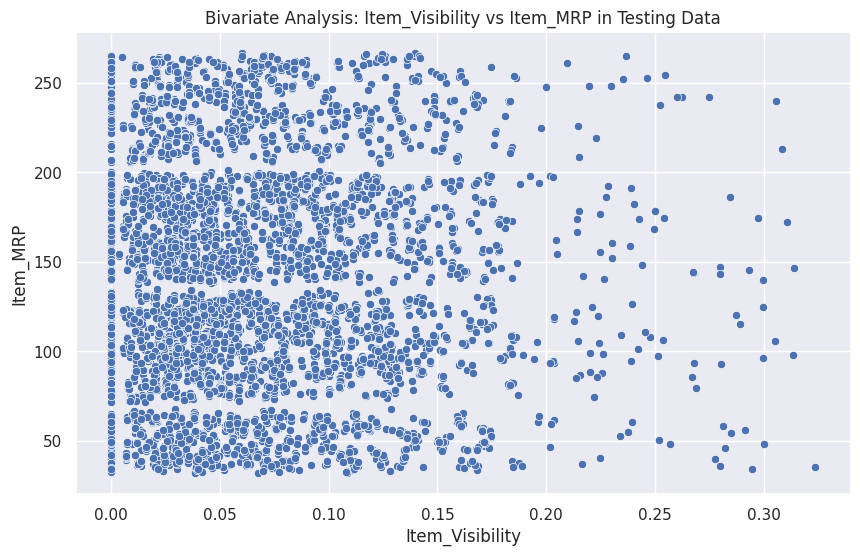

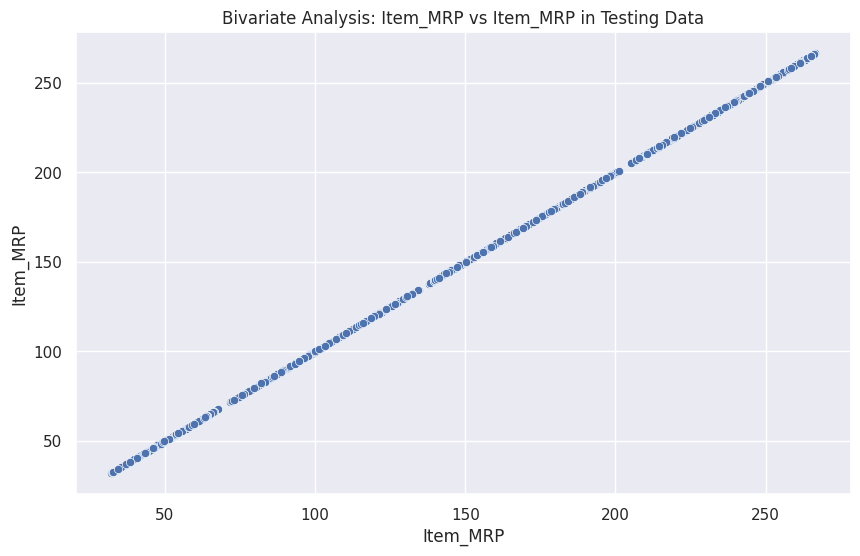

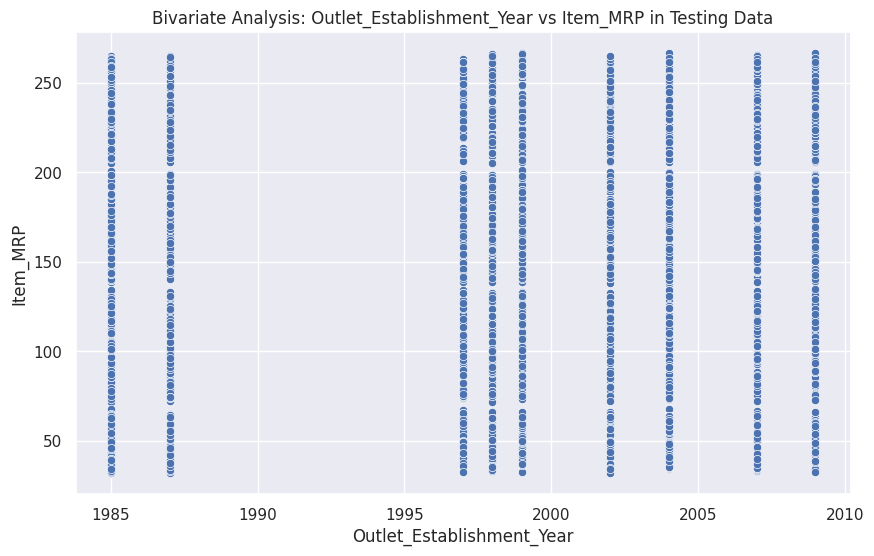

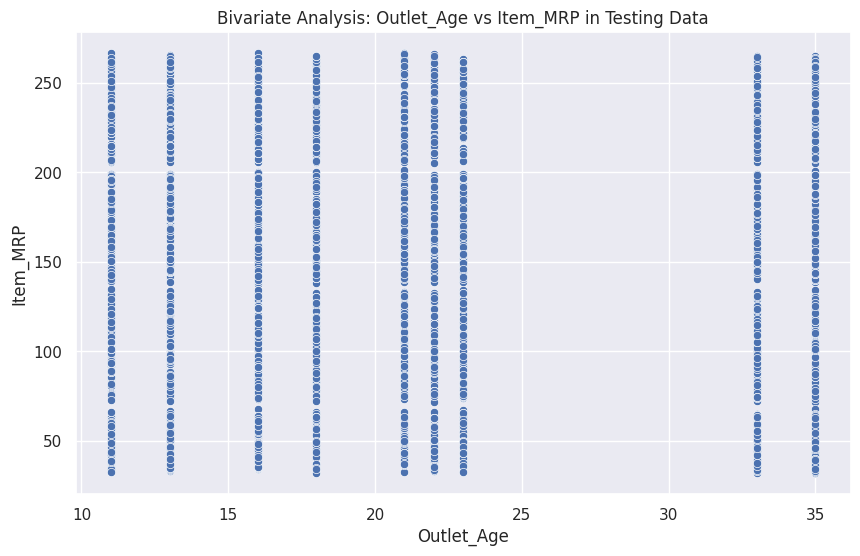

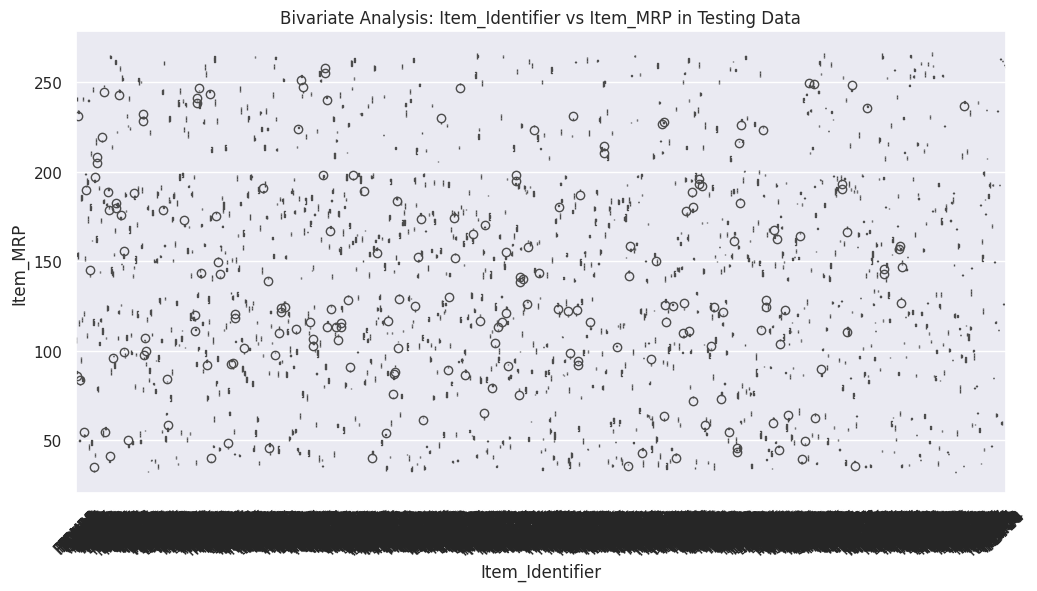

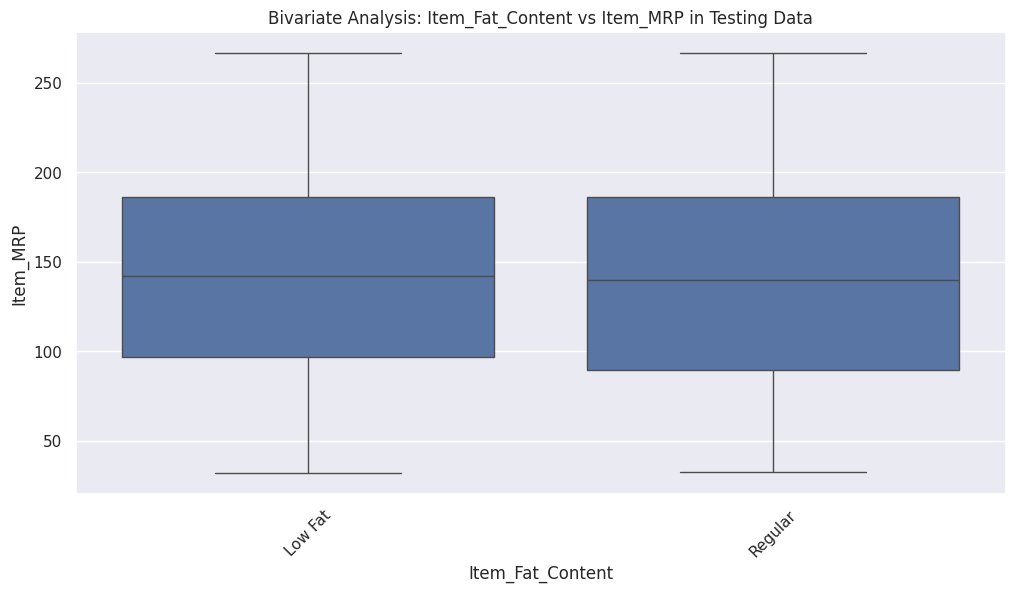

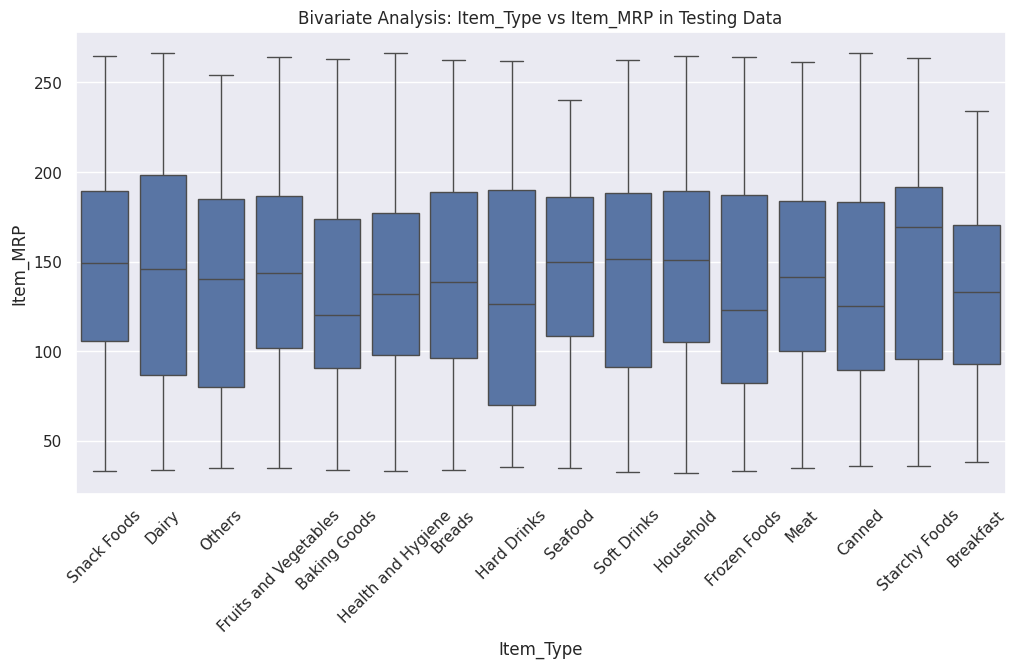

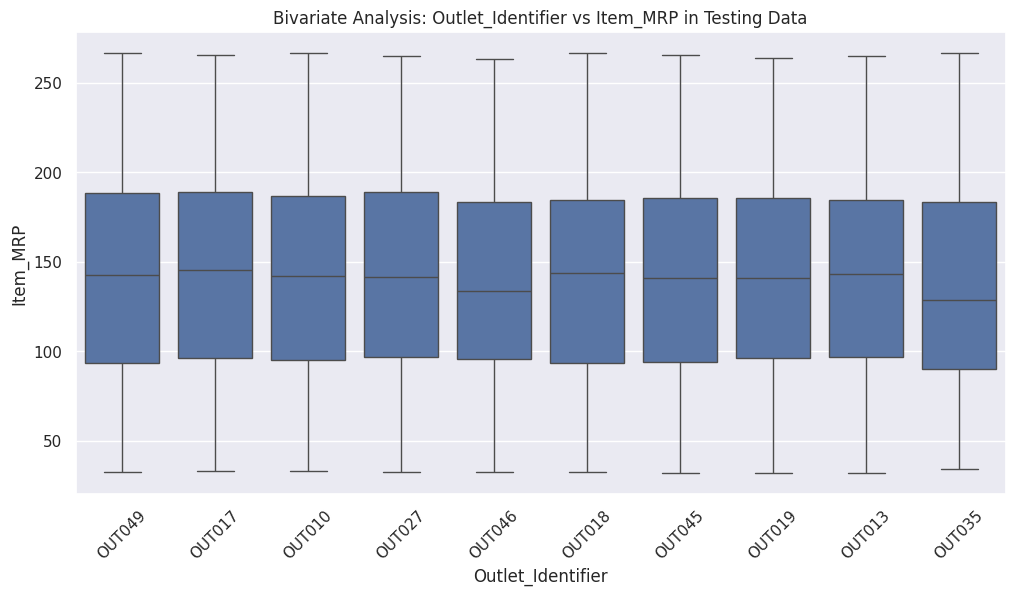

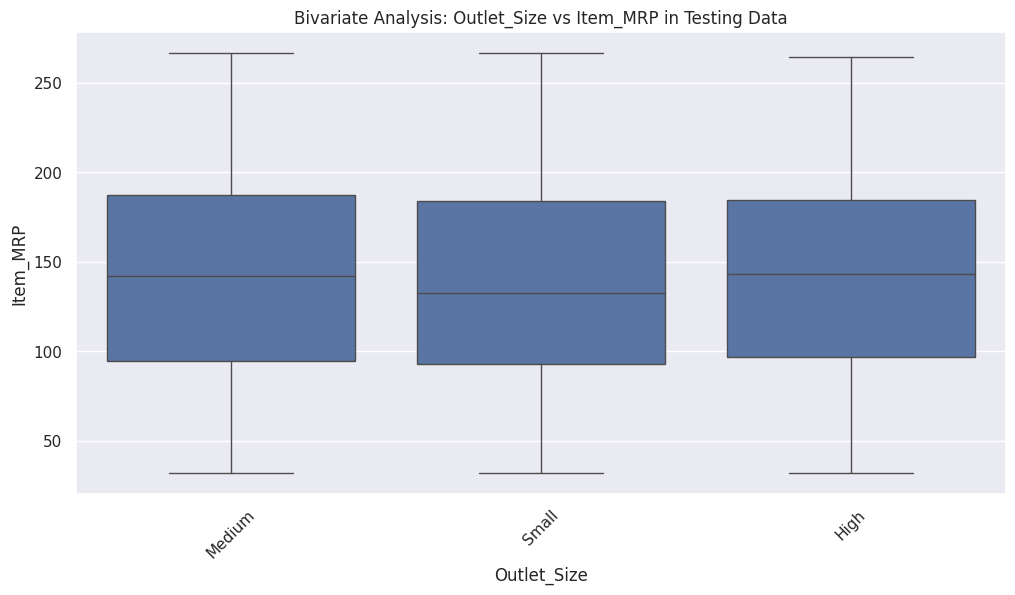

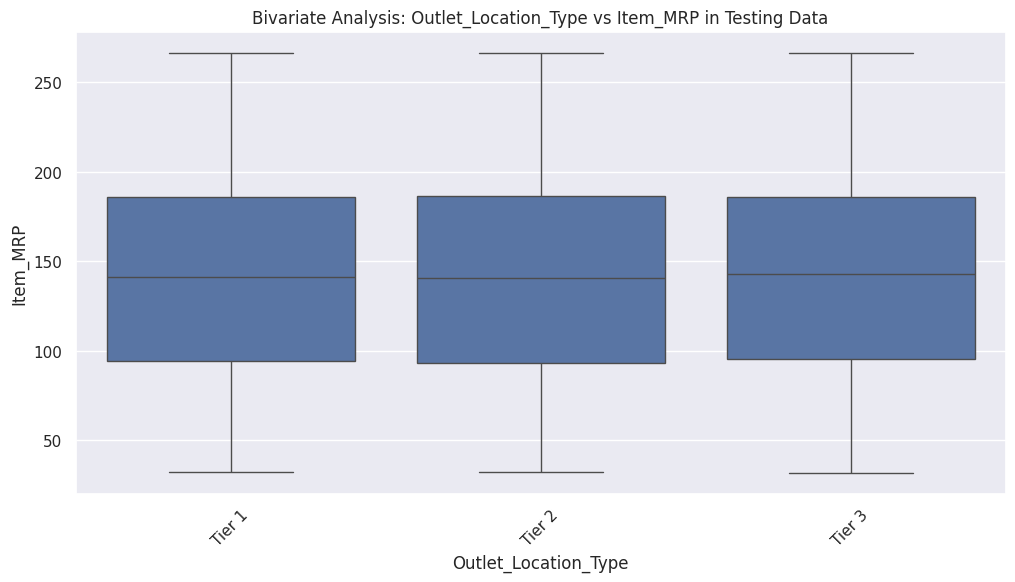

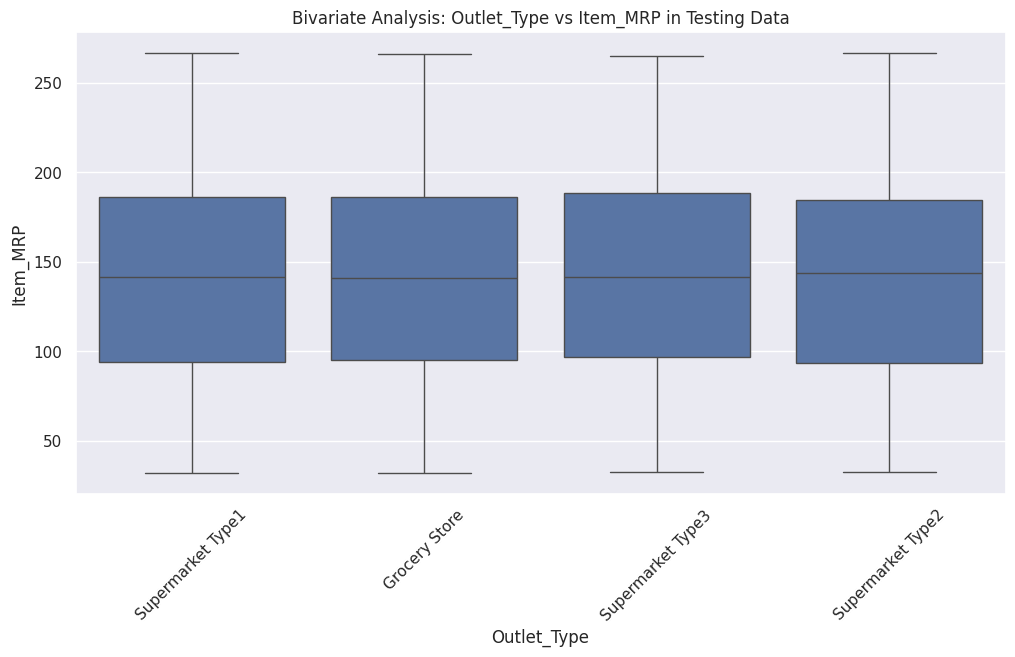

In [ ]:
# Bivariate Analysis for testing data

# Bivariate analysis for numerical features
numerical_features = Test_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Item_MRP', data=Test_df)  # Adjust 'Item_MRP' based on your target variable
    plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
    plt.show()

# Bivariate analysis for categorical features
categorical_features = Test_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Item_MRP', data=Test_df)  # Adjust 'Item_MRP' based on your target variable
    plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
    plt.xticks(rotation=45)
    plt.show()


#### numeric columns realizations

* `Outlet_Age` - The most common outlets are 35 years old.
* `Item_Weight` - The data is very spreaded, no specific pattern.
* `Item_Visibility` - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP` - Items with higher MRP tend to sell better in most cases.


### multivariate plots
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

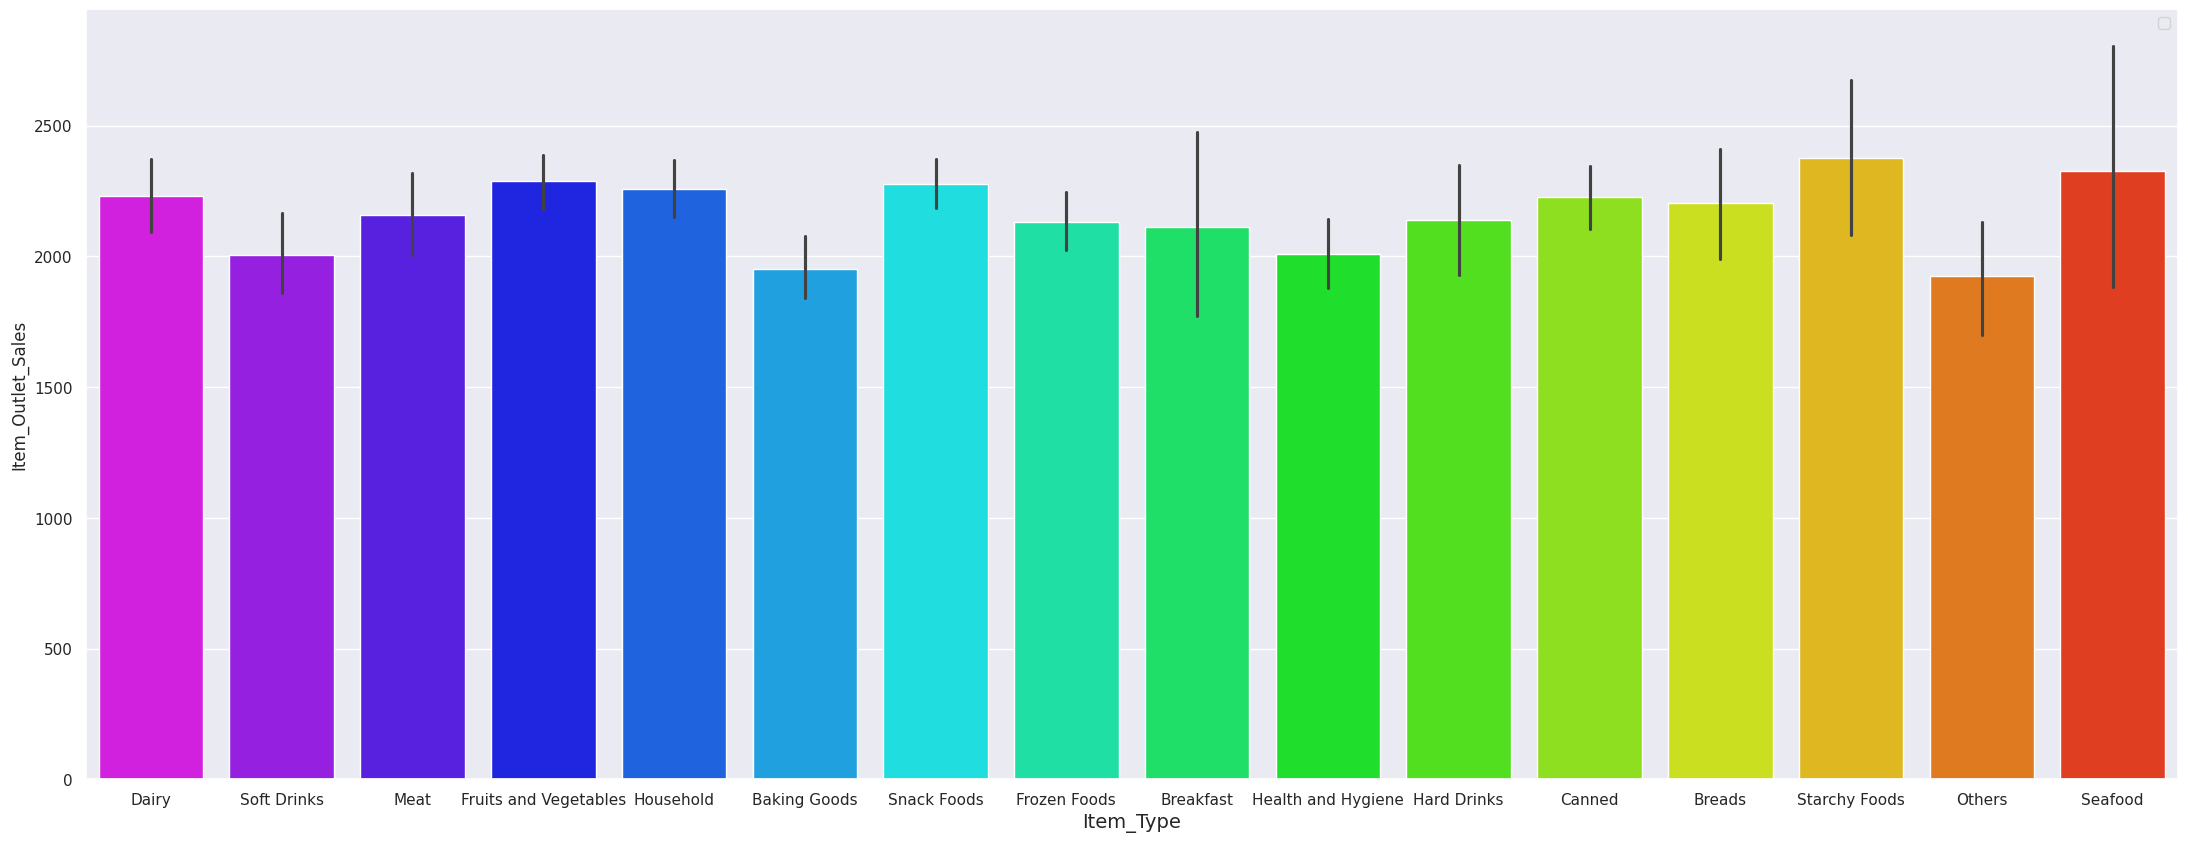

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=Train_df ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

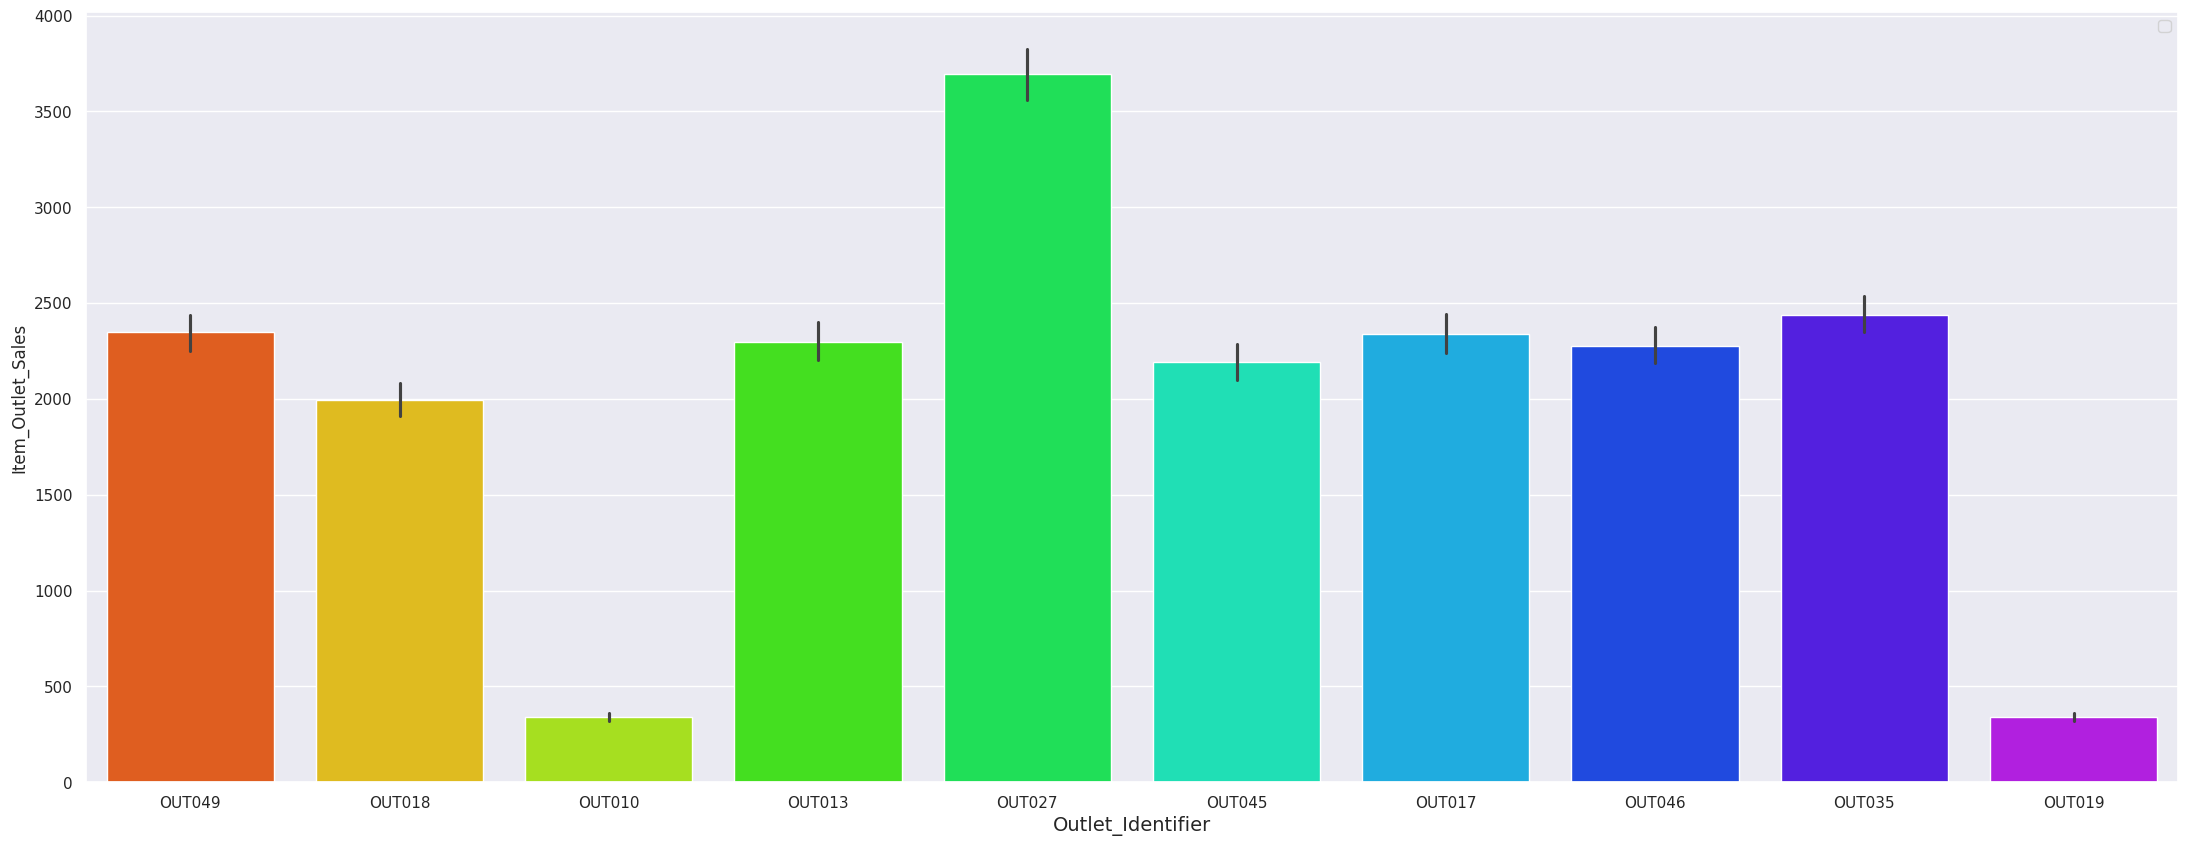

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=Train_df ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

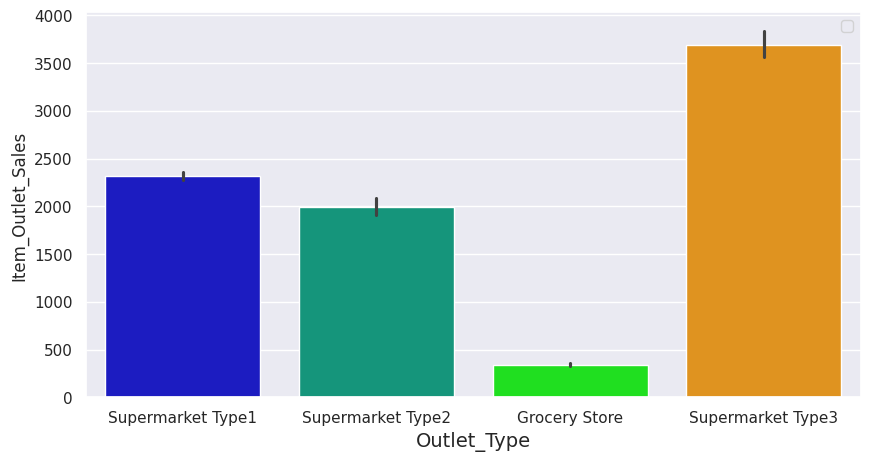

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=Train_df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

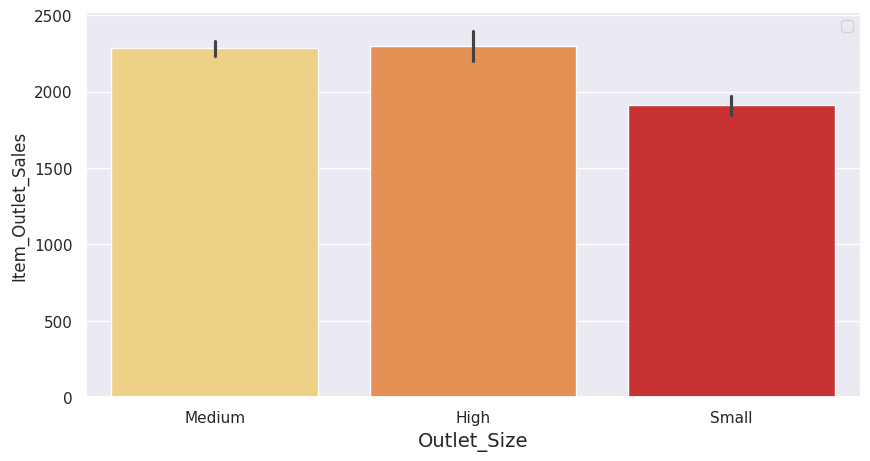

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=Train_df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

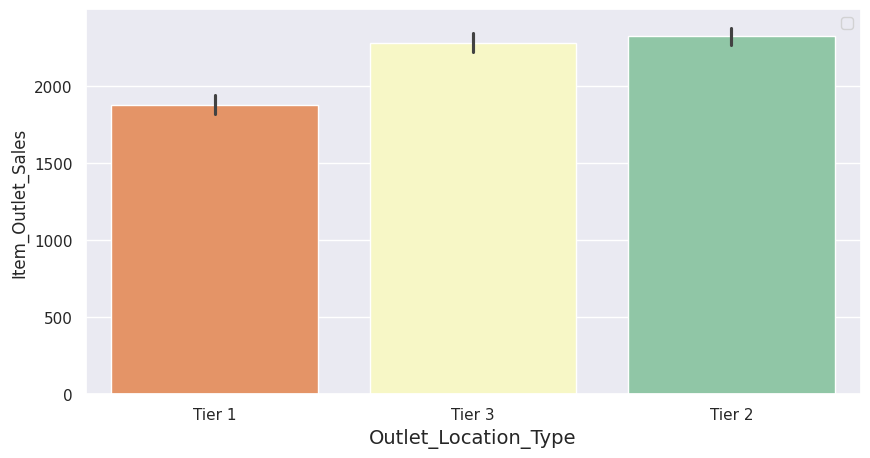

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=Train_df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

#### Realizations:

* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

##Correlation

<Axes: >

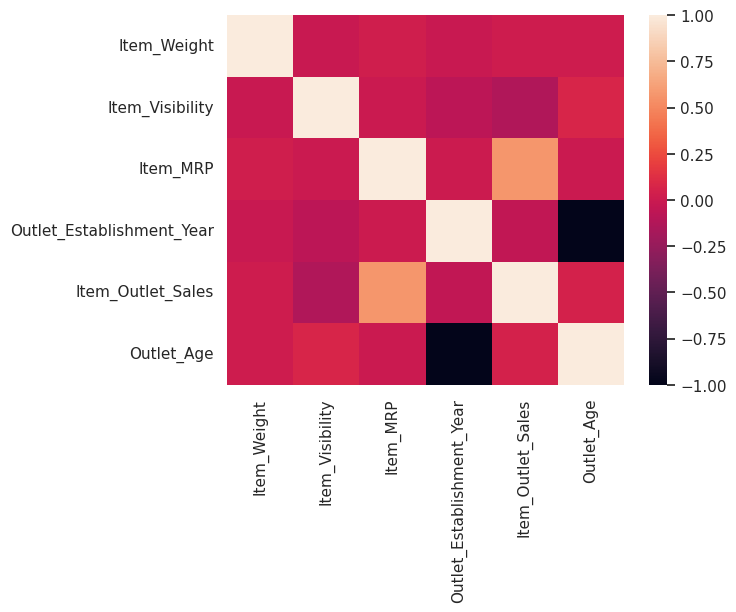

In [ ]:
#plotting the correlation matrix
sns.heatmap(Train_df.corr() ,cmap='rocket')

### Feature Engineering

**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [ ]:
# Mapping dictionary for feature engineering in training data
print("Unique values in 'Item_Type' column before feature engineering:", Train_df['Item_Type'].unique())
item_type_mapping = {
    'Dairy': 'Perishable',
    'Soft Drinks': 'Non-Perishable',
    'Meat': 'Perishable',
    'Fruits and Vegetables': 'Perishable',
    'Household': 'Non-Perishable',
    'Baking Goods': 'Non-Perishable',
    'Snack Foods': 'Non-Perishable',
    'Frozen Foods': 'Perishable',
    'Breakfast': 'Non-Perishable',
    'Health and Hygiene': 'Non-Perishable',
    'Hard Drinks': 'Non-Perishable',
    'Canned': 'Non-Perishable',
    'Breads': 'Non-Perishable',
    'Starchy Foods': 'Non-Perishable',
    'Others': 'Non-Perishable',
    'Seafood': 'Perishable',
}

# Apply feature engineering to create 'Item_Category' column in testing data
Train_df['Item_Category'] = Train_df['Item_Type'].map(item_type_mapping)

# Display unique values in the new feature 'Item_Category' in testing data
print("Unique values in 'Item_Category' in training data after feature engineering:", Train_df['Item_Category'].unique())


Unique values in 'Item_Type' column before feature engineering: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in 'Item_Category' in training data after feature engineering: ['Perishable' 'Non-Perishable']


In [ ]:
#Feature engineering for testing dataset
# Display unique values in 'Item_Type' column before feature engineering
print("Unique values in 'Item_Type' column before feature engineering:", Test_df['Item_Type'].unique())

# Mapping dictionary for feature engineering in testing data
item_type_mapping = {
    'Dairy': 'Perishable',
    'Soft Drinks': 'Non-Perishable',
    'Meat': 'Perishable',
    'Fruits and Vegetables': 'Perishable',
    'Household': 'Non-Perishable',
    'Baking Goods': 'Non-Perishable',
    'Snack Foods': 'Non-Perishable',
    'Frozen Foods': 'Perishable',
    'Breakfast': 'Non-Perishable',
    'Health and Hygiene': 'Non-Perishable',
    'Hard Drinks': 'Non-Perishable',
    'Canned': 'Non-Perishable',
    'Breads': 'Non-Perishable',
    'Starchy Foods': 'Non-Perishable',
    'Others': 'Non-Perishable',
    'Seafood': 'Perishable',
}

# Create a new feature 'Item_Category' in testing data
Test_df['Item_Category'] = Test_df['Item_Type'].map(item_type_mapping)

# Display unique values in the new feature 'Item_Category' in testing data
print("Unique values in 'Item_Category' in testing data after feature engineering:", Test_df['Item_Category'].unique())


Unique values in 'Item_Type' column before feature engineering: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Unique values in 'Item_Category' in testing data after feature engineering: ['Non-Perishable' 'Perishable']


In [ ]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

###Label Encoding

In [ ]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    Train_df[i] = le.fit_transform(Train_df[i])
    Test_df[i] = le.fit_transform(Test_df[i])

Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,21,Perishable
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,11,Non-Perishable
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,21,Perishable
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,22,Perishable
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,33,Non-Perishable


###one hot Encoding

In [ ]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
Train_oh = pd.DataFrame(OH_encoder.fit_transform(Train_df[cols])).astype('int64')
Test_oh = pd.DataFrame(OH_encoder.fit_transform(Test_df[cols])).astype('int64')

#get feature columns
Train_oh.columns = OH_encoder.get_feature_names_out(cols)
Test_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
Train_oh.index = Train_df.index
Test_oh.index = Test_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
Train_fe = pd.concat([Train_df, Train_oh], axis=1)
Test_fe = pd.concat([Test_df, Test_oh], axis=1)

In [ ]:
# Dropping irrelevant columns

Train_fe  = Train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
Test_fe = Test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [ ]:
Train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,Item_Type_0,...,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,Perishable,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,Non-Perishable,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,Perishable,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,Perishable,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,Non-Perishable,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Test_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Category,Item_Type_0,Item_Type_1,...,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0,0.007565,107.8622,1,0,21,Non-Perishable,0,0,...,0,0,0,1,0,0,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,13,Perishable,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,22,Non-Perishable,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,13,Non-Perishable,0,0,...,0,0,0,1,0,0,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,35,Perishable,0,0,...,0,0,0,0,0,0,0,0,0,1


# Machine learning models

![](https://media4.giphy.com/media/4TtTVTmBoXp8txRU0C/200w.webp?cid=ecf05e47hbwccgi1rqz8b91h2vj504ui7e6q02oscy461q42&rid=200w.webp)

First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `	Item_Outlet_Sales` the target value we want to predict.

**Assumptions:**

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

## Models we will use:

* **Linear Regression**
* **Random Forest Regressor**
* **Lasso Regressor**

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics

### Score Metrics for Regression:

* **Mean Absolute Error (MAE)**  -  Mean of the absolute value of errors (absolute distance from true value):
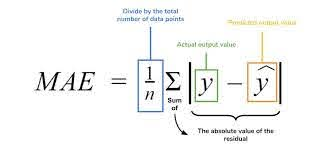

* **Mean Squared Error (MSE)**  -  Mean of the squared value of errors (squared distance from true value):
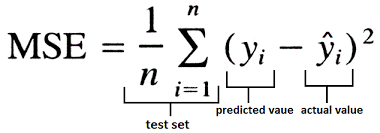

* **R^2 (coefficient of determination)**  -  Regression score function.:
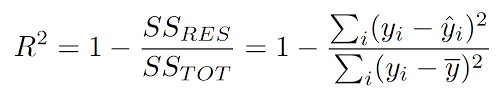

In [ ]:
y = Train_fe['Item_Outlet_Sales']
X = Train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [ ]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression

![](https://cdn.filestackcontent.com/WCbMsxiSLW2H1SyqunQm)

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine (more info on [wikipedia](https://en.wikipedia.org/wiki/Linear_regression)).


In [ ]:
#model
LR = model = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")


 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593



### Csv results of the test for our model:
![](https://media2.giphy.com/media/26DN2iTaW5mmmJtug/200.webp?cid=ecf05e47ceq530n5mwtmqi7lb6tg74y5k2ji2pte6j5ckita&rid=200.webp)
You can see each predition and true value side by side by the csv created in the output directory.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 3: Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

# Display the evaluation metrics on the validation set
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

# Step 4: Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

Mean Squared Error on Validation Set: 1187855.2498311067
Root Mean Squared Error on Validation Set: 1089.8877234977494


# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 2: Train the model on the training set
xgb_model.fit(X_train, y_train)

# Step 3: Evaluate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

# Display the evaluation metrics on the validation set
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

# Step 4: Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)

Mean Squared Error on Validation Set: 1292186.8787421188
Root Mean Squared Error on Validation Set: 1136.7439811769925


# Hyper Parameter Tuning XGB and GBR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Hyperparameter grid for XGBoost
xgb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Create RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_dist,
    scoring='neg_mean_squared_error',
    n_iter=10,  # You can adjust the number of iterations
    cv=3,
    random_state=42
)

# Fit the model to the data
xgb_random_search.fit(X_train, y_train)

# Display the best hyperparameters for XGBoost
print("Best hyperparameters for XGBoost:")
print(xgb_random_search.best_params_)

Best hyperparameters for XGBoost:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


# Standard Scaling 06m Robust Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform on training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation set and test set using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_val_scaled)
print(X_test_scaled)



[[-0.80021083 -0.60070308  0.47070929 ... -0.35209326 -0.35445699
   1.27687166]
 [ 1.21131742 -0.36215854  0.45787656 ... -0.35209326 -0.35445699
  -0.78316407]
 [ 1.11665727  0.19493285 -0.48262534 ... -0.35209326 -0.35445699
   1.27687166]
 ...
 [ 1.11665727 -0.91693149  1.52620691 ... -0.35209326 -0.35445699
  -0.78316407]
 [ 1.76744582 -0.22818684 -0.38307175 ... -0.35209326 -0.35445699
  -0.78316407]
 [ 0.82084429 -0.95485942 -0.73811593 ... -0.35209326 -0.35445699
  -0.78316407]]
[[ 0.33571101 -0.77388703 -0.99890847 ... -0.35209326 -0.35445699
   1.27687166]
 [-1.17175193  0.09797779 -1.58604822 ... -0.35209326 -0.35445699
  -0.78316407]
 [ 0.38304109 -0.48194218 -1.59665209 ... -0.35209326 -0.35445699
  -0.78316407]
 ...
 [ 0.38304109 -0.48385674 -1.59665209 ... -0.35209326 -0.35445699
  -0.78316407]
 [-0.72921571  1.46010317 -1.46145914 ...  2.84015657 -0.35445699
  -0.78316407]
 [-1.17766819 -0.21387994 -0.52251456 ... -0.35209326 -0.35445699
   1.27687166]]
[[ 1.86210598 -1

In [ ]:
# Robust scaling
from sklearn.preprocessing import RobustScaler

# Instantiate the scaler
robust_scaler = RobustScaler()

# Fit and transform on training set
X_train_robust_scaled = robust_scaler.fit_transform(X_train)

# Transform the validation set and test set using the same scaler
X_val_robust_scaled = robust_scaler.transform(X_val)
X_test_robust_scaled = robust_scaler.transform(X_test)

print(X_train_robust_scaled)
print(X_val_robust_scaled)
print(X_test_robust_scaled)

[[-0.50076737 -0.27888189  0.29220849 ...  0.          0.
   1.        ]
 [ 0.7669433  -0.09808687  0.28354863 ...  0.          0.
   0.        ]
 [ 0.70728633  0.32413765 -0.3511271  ...  0.          0.
   1.        ]
 ...
 [ 0.70728633 -0.51855422  1.00448639 ...  0.          0.
   0.        ]
 [ 1.11742801  0.00345148 -0.28394569 ...  0.          0.
   0.        ]
 [ 0.52085829 -0.54730013 -0.52353896 ...  0.          0.
   0.        ]]
[[ 0.2151163  -0.41013955 -0.6995287  ...  0.          0.
   1.        ]
 [-0.73492098  0.25065455 -1.09574624 ...  0.          0.
   0.        ]
 [ 0.24494479 -0.18887195 -1.10290202 ...  0.          0.
   0.        ]
 ...
 [ 0.24494479 -0.19032301 -1.10290202 ...  0.          0.
   0.        ]
 [-0.45602464  1.28302148 -1.01167021 ...  1.          0.
   0.        ]
 [-0.73864954  0.0142948  -0.37804541 ...  0.          0.
   1.        ]]
[[ 1.17708498 -0.68625543 -0.39275402 ...  0.          0.
   0.        ]
 [-0.67973828 -0.23139884 -0.61440175 .

# Final Prediction on Test Data Set

In [ ]:
from xgboost import XGBRegressor

# Instantiate the model with the best hyperparameters
final_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.9, subsample=1.0, random_state=42)

# Train the final model on the full training dataset
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test dataset
test_predictions = final_model.predict(X_test)
print(test_predictions)

[1562.2141 1343.8392 1193.4575 ... 1859.846  3852.1794 1269.015 ]


# Conclusion

![](https://thumbs.gfycat.com/ShamelessRaggedErin-size_restricted.gif)

## Realizations

* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Lasso Regressor have the best perfomance in most categories.
* only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need tuning e.g. Grid Search.

#**THE** **END**